## Let's peek at a sample of the NLS data

In [12]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.7 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 18.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 29.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [13]:
records = []
with open('txtBIBLIOGRAPHIC_11573881650004341_01.txt', encoding='utf-8') as f:
    for line in f:
        fields = [field.strip() for field in line.strip().split('\t') if field.strip()]
        record = {}
        for field in fields:
            if ':' in field:
                key, value = field.split(':', 1)
                record[key.strip()] = value.strip()
        records.append(record)

df = pd.DataFrame(records)
df.head()

,Title,Creator,Type,Publisher,Date,Language,Format,Relation,Rights,Identifier,Description,Subject,Coverage,Contributor,Source
0,Travel /,"Leeson, Edward,1947-2011.",text,London J. Murray,1980,eng,,,,,,"Short stories, English.",,,
1,Resource book of test items in chemistry,"Jenkins, E. W.(Edgar William)",text,London Murray,1981,eng,,,,,Bibliography: p15,Chemistry,,,
2,Arbitration for contractors,"Stephenson, Douglas A.",text,Northwood Books,1982,,,,,,,,,,
3,Armorial bearings of the sovereigns of England...,"Petchey, William John. Browne, Royman. Standin...",text,London Bedford Square Press [for the] Standing...,1977,eng,,,,,"Previous ed.: i.e. Revised ed., published as '...",Heraldry,,,
4,"Sharing caring : caring, equal opportunities a...","Thompson, Catherine.",text,Community Care Project,[1985],,,,,,,,,,


Columns: ['Title', 'Creator', 'Type', 'Publisher', 'Date', 'Language', 'Format', 'Relation', 'Rights', 'Identifier', 'Description', 'Subject', 'Coverage', 'Contributor', 'Source']

Sample data:


,Title,Creator,Type,Publisher,Date,Language,Format,Relation,Rights,Identifier,Description,Subject,Coverage,Contributor,Source
0,Travel /,"Leeson, Edward,1947-2011.",text,London J. Murray,1980,eng,,,,,,"Short stories, English.",,,
1,Resource book of test items in chemistry,"Jenkins, E. W.(Edgar William)",text,London Murray,1981,eng,,,,,Bibliography: p15,Chemistry,,,
2,Arbitration for contractors,"Stephenson, Douglas A.",text,Northwood Books,1982,,,,,,,,,,
3,Armorial bearings of the sovereigns of England...,"Petchey, William John. Browne, Royman. Standin...",text,London Bedford Square Press [for the] Standing...,1977,eng,,,,,"Previous ed.: i.e. Revised ed., published as '...",Heraldry,,,
4,"Sharing caring : caring, equal opportunities a...","Thompson, Catherine.",text,Community Care Project,[1985],,,,,,,,,,


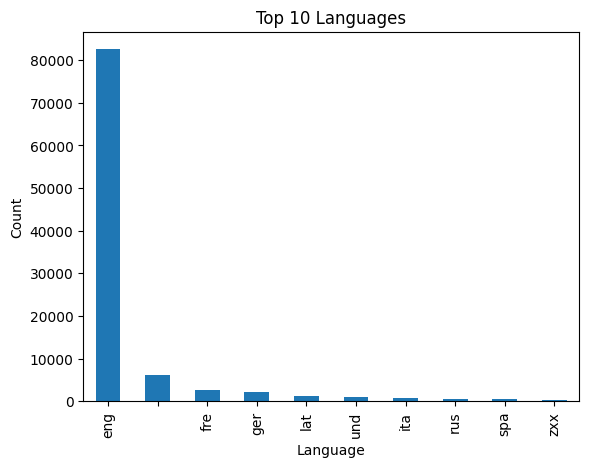

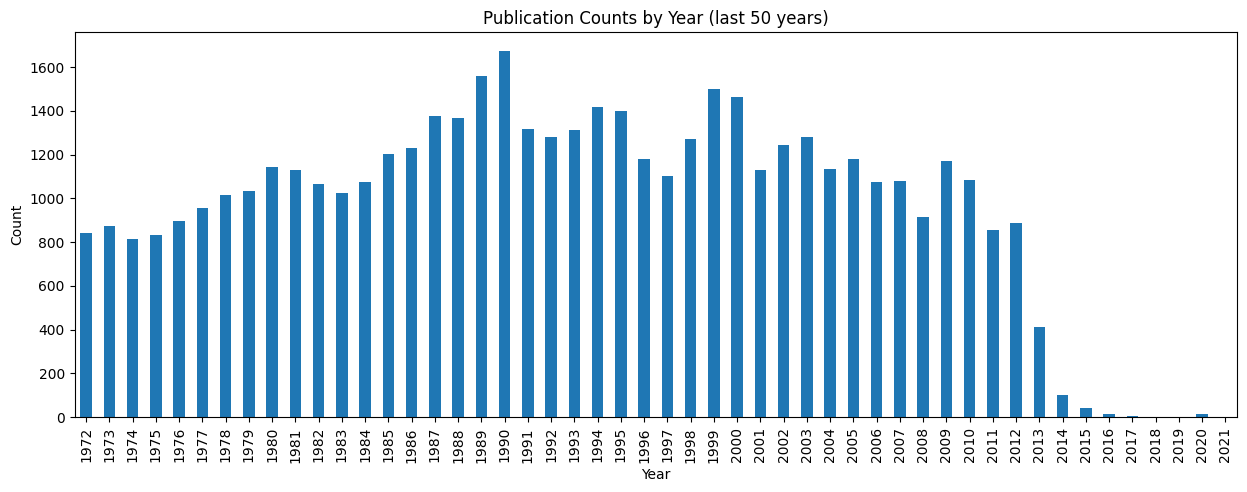

In [15]:
# Show basic info about the dataframe
print("Columns:", df.columns.tolist())
print("\nSample data:")
display(df.head())

# Visualize the most common languages
top_languages = df['Language'].value_counts().head(10)
top_languages.plot(kind='bar', title='Top 10 Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

# Visualize the most common publication years (extracting year from 'Date')
df['Year'] = df['Date'].str.extract(r'(\d{4})')
top_years = df['Year'].value_counts().sort_index().tail(50)
top_years.plot(kind='bar', figsize=(15,5), title='Publication Counts by Year (last 50 years)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Total records: 100000
Mean publication count per year: 158.61333333333334
Standard deviation of publication counts: 316.1963846072198
Years with unusually low publication counts (potential gaps): []
Languages with fewer than 50 records (potential gaps):


Language
mul    45
sco    44
cze    41
gle    39
ara    39
       ..
cre     1
aze     1
gal     1
tem     1
alb     1
Name: count, Length: 104, dtype: int64

Subjects with fewer than 10 records (potential gaps):


Subject
City planning Regional planning                9
Painting                                       9
Crime prevention                               9
Business &amp; Economics Economic History      9
Zoology                                        9
                                              ..
Recidivism Criminal behavior, Prediction of    1
Telecommunication systems Disaster relief      1
PowerBuilder. Application software             1
Slavery Sectionalism (United States)           1
Shipping Steamboats Tea trade                  1
Name: count, Length: 30615, dtype: int64

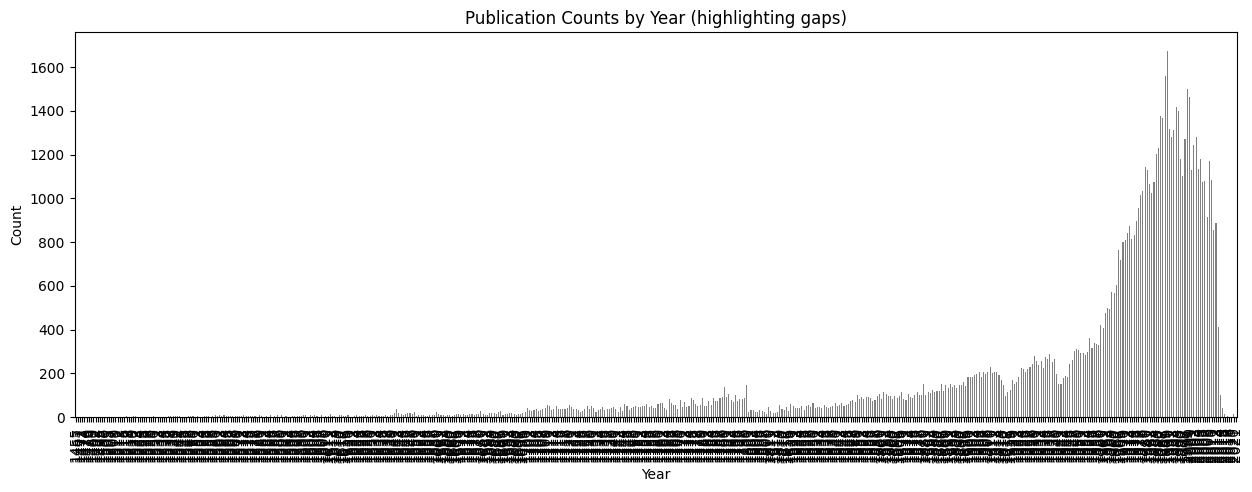

In [ ]:
print("Total records:", len(df))

# Find years with unusually low publication counts (potential gaps)
year_counts = df['Year'].value_counts().sort_index()
mean_count = year_counts.mean()
print("Mean publication count per year:", mean_count)
std_count = year_counts.std()
print("Standard deviation of publication counts:", std_count)
gap_years = year_counts[year_counts < (mean_count - std_count)]
print(f"Years with unusually low publication counts (potential gaps): {list(gap_years.index)}")

# Find languages with very few records (potentially underrepresented)
rare_languages = df['Language'].value_counts()
rare_languages = rare_languages[rare_languages < 50]
print("Languages with fewer than 50 records (potential gaps):")
display(rare_languages)

# Find subjects that are common in other libraries but rare here (if you have a reference list)
# For now, just show the least common subjects in this dataset
subject_counts = df['Subject'].value_counts()
rare_subjects = subject_counts[subject_counts < 10]
print("Subjects with fewer than 10 records (potential gaps):")
display(rare_subjects)